In [34]:
import os
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import json

In [35]:
train_df = pd.read_csv('/home/sergio/datasets/imaterialist/train.csv')
train_path = '/home/sergio/datasets/imaterialist/images/train'
train_df.head()

,ImageId,EncodedPixels,Height,Width,ClassId,AttributesIds
0,00000663ed1ff0c4e0132b9b9ac53f6e,6068157 7 6073371 20 6078584 34 6083797 48 608...,5214,3676,6,"115,136,143,154,230,295,316,317"
1,00000663ed1ff0c4e0132b9b9ac53f6e,6323163 11 6328356 32 6333549 53 6338742 75 63...,5214,3676,0,"115,136,142,146,225,295,316,317"
2,00000663ed1ff0c4e0132b9b9ac53f6e,8521389 10 8526585 30 8531789 42 8537002 46 85...,5214,3676,28,163
3,00000663ed1ff0c4e0132b9b9ac53f6e,12903854 2 12909064 7 12914275 10 12919485 15 ...,5214,3676,31,"160,204"
4,00000663ed1ff0c4e0132b9b9ac53f6e,10837337 5 10842542 14 10847746 24 10852951 33...,5214,3676,32,219


In [36]:
with open('/home/sergio/datasets/imaterialist/label_descriptions.json', 'r') as f:
    label_descriptions = json.load(f)

In [37]:
print(f"Number of train images: {train_df['ImageId'].nunique()}",)
print(f"Number of categories: {len(label_descriptions['categories'])}")
print(f"Number of attributes: {len(label_descriptions['attributes'])}")

Number of train images: 45623
Number of categories: 46
Number of attributes: 294


In [38]:
categories_df = pd.DataFrame(label_descriptions['categories'])
attributes_df = pd.DataFrame(label_descriptions['attributes'])
categories_df

,id,name,supercategory,level
0,0,"shirt, blouse",upperbody,2
1,1,"top, t-shirt, sweatshirt",upperbody,2
2,2,sweater,upperbody,2
3,3,cardigan,upperbody,2
4,4,jacket,upperbody,2
5,5,vest,upperbody,2
6,6,pants,lowerbody,2
7,7,shorts,lowerbody,2
8,8,skirt,lowerbody,2
9,9,coat,wholebody,2


In [39]:
pd.set_option('display.max_rows', 300)
attributes_df

,id,name,supercategory,level
0,0,classic (t-shirt),nickname,1
1,1,polo (shirt),nickname,1
2,2,undershirt,nickname,1
3,3,henley (shirt),nickname,1
4,4,ringer (t-shirt),nickname,1
5,5,raglan (t-shirt),nickname,1
6,6,rugby (shirt),nickname,1
7,7,sailor (shirt),nickname,1
8,8,crop (top),nickname,1
9,9,halter (top),nickname,1


ImageId                           00000663ed1ff0c4e0132b9b9ac53f6e
EncodedPixels    6068157 7 6073371 20 6078584 34 6083797 48 608...
Height                                                        5214
Width                                                         3676
ClassId                                                          6
AttributesIds                      115,136,143,154,230,295,316,317
Name: 0, dtype: object


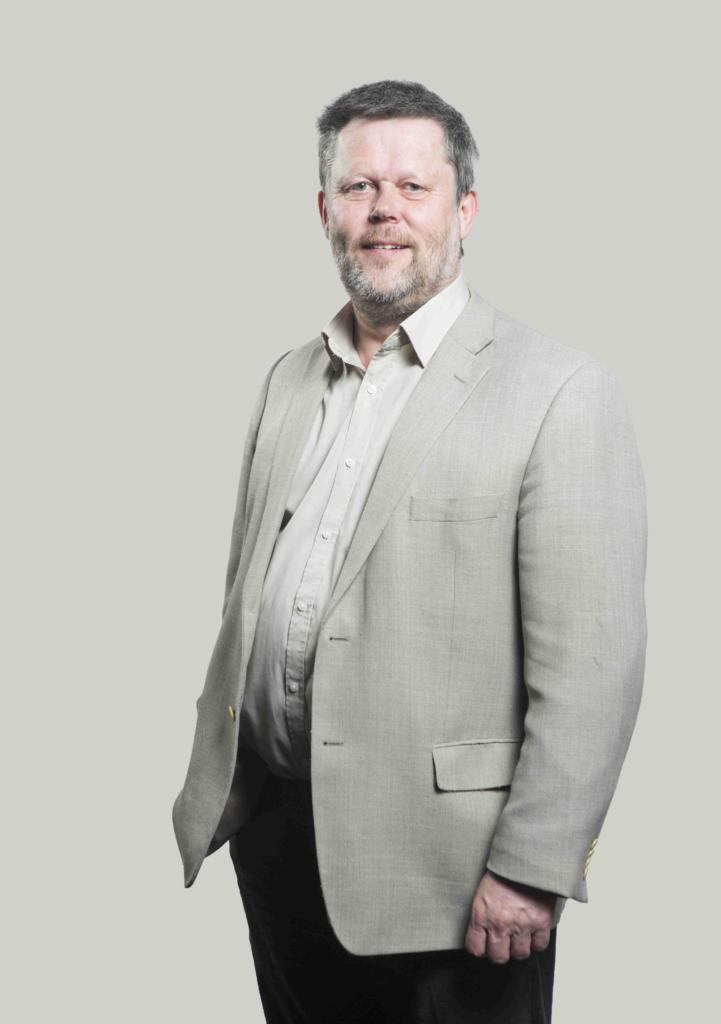

In [40]:
sample = train_df.iloc[0]
image_path = os.path.join(train_path, sample['ImageId'] + '.jpg')
image = Image.open(image_path)
print(sample)
image

In [41]:
# copied from https://ccshenyltw.medium.com/run-length-encode-and-decode-a33383142e6b
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated: [start0] [length0] [start1] [length1]... in 1d array
    shape: (height,width) of array to return
    Returns numpy array according to the shape, 1 - mask, 0 - background
    '''
    shape = (shape[1], shape[0])
    s = mask_rle.split()
    # gets starts & lengths 1d arrays
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    # gets ends 1d array
    ends = starts + lengths
    # creates blank mask image 1d array
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    # sets mark pixels
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    # reshape as a 2d mask image
    return img.reshape(shape).T  # Needed to align to RLE direction

In [47]:
def get_masks(df, img_idx):
    img_id = df.iloc[img_idx].ImageId
    orig_height = df.iloc[img_idx].Height
    orig_width = df.iloc[img_idx].Width

    sub_df = df[df['ImageId'] == img_id]
    mask_rles = sub_df.EncodedPixels.to_list()
    categories = sub_df.ClassId.to_list()

    masks = list(map(lambda x: rle_decode(x, (orig_height,orig_width)), mask_rles))
    
    return masks, categories

In [52]:
def show_image(df, path, img_idx):
    image_id = df.iloc[img_idx].ImageId
    img = cv2.imread(os.path.join(train_path, image_id + '.jpg'), cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)  
    plt.figure(figsize=[30,30])
    plt.subplot(1,10,1)
    plt.imshow(img)    
    plt.title('Input Image')
    
    masks, categories = get_masks(df, img_idx)
    label_names = [x['name'] for x in label_descriptions['categories']]
    i=1
    for mask, cat in zip(masks, categories):
        mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)
        plt.subplot(1,10,i+1)
        plt.imshow(mask)
        plt.title(label_names[int(cat)])
        i+=1

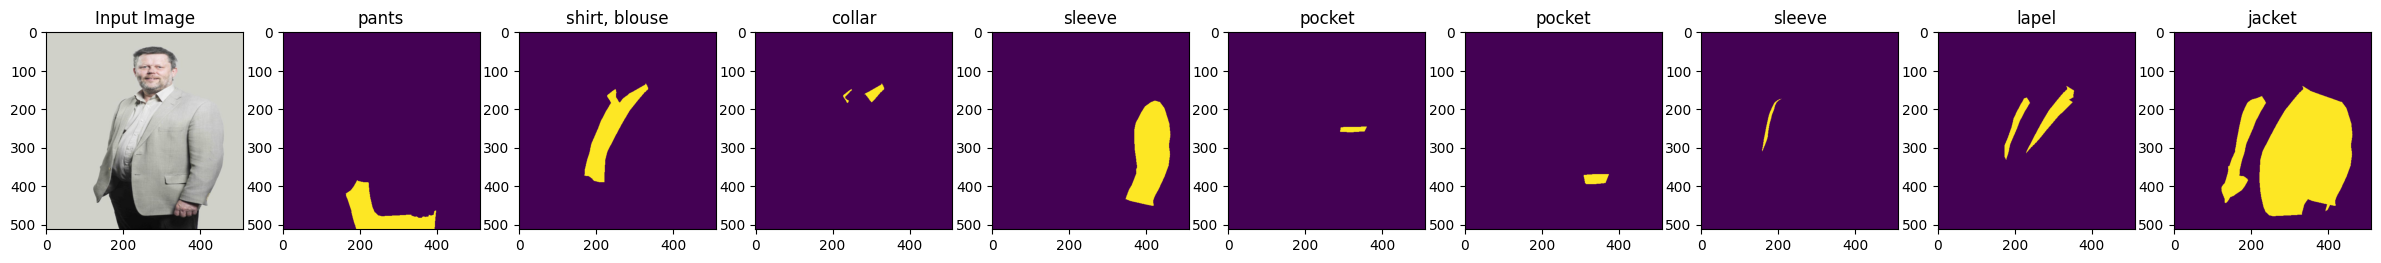

In [53]:
show_image(train_df, train_path, 0)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to decode run-length encoding (RLE)
def rle_decode(mask_rle, shape):
    shape = (shape[1], shape[0])  # Swap dimensions to align with RLE
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0::2], s[1::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Transpose to align correctly

# Function to get all masks for an image
def get_masks(df, img_idx):
    img_id = df.iloc[img_idx].ImageId
    orig_height = df.iloc[img_idx].Height
    orig_width = df.iloc[img_idx].Width

    sub_df = df[df['ImageId'] == img_id]
    mask_rles = sub_df.EncodedPixels.to_list()
    categories = sub_df.ClassId.to_list()

    masks = [rle_decode(x, (orig_height, orig_width)) for x in mask_rles]
    return masks, categories

# Function to overlay all masks on the original image with better clarity
def show_image_with_masks(df, path, img_idx):
    image_id = df.iloc[img_idx].ImageId
    image_path = os.path.join(path, image_id + ".jpg")
    
    # Load and resize image
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Error: Image not found at {image_path}")
        return
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_AREA)

    # Get all masks and category labels
    masks, categories = get_masks(df, img_idx)
    label_names = {x['id']: x['name'] for x in label_descriptions['categories']}

    # Create an empty canvas for overlay
    mask_overlay = np.zeros_like(img, dtype=np.uint8)

    # Generate distinct colors for each class
    unique_categories = list(set(categories))
    color_map = {cat: [random.randint(50, 255) for _ in range(3)] for cat in unique_categories}

    # Overlay masks with outlines
    for mask, cat in zip(masks, categories):
        mask = cv2.resize(mask, (512, 512), interpolation=cv2.INTER_NEAREST)
        color = color_map[cat]
        
        # Blend the mask into the overlay with transparency
        mask_overlay[mask == 1] = color
        
        # Add contour (border) to make masks distinguishable
        contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(mask_overlay, contours, -1, (255, 255, 255), thickness=2)  # White outline

    # Blend the original image with the mask overlay (increased contrast)
    blended = cv2.addWeighted(img, 0.6, mask_overlay, 0.7, 0)

    # Display the final result
    plt.figure(figsize=(10, 10))
    plt.imshow(blended)
    
    # Show class names on top
    title_text = f"Segmented Clothing Items: {image_id}\n" + ", ".join([label_names.get(cat, "Unknown") for cat in unique_categories])
    plt.title(title_text, fontsize=12, color="black")
    
    plt.axis("off")
    plt.show()

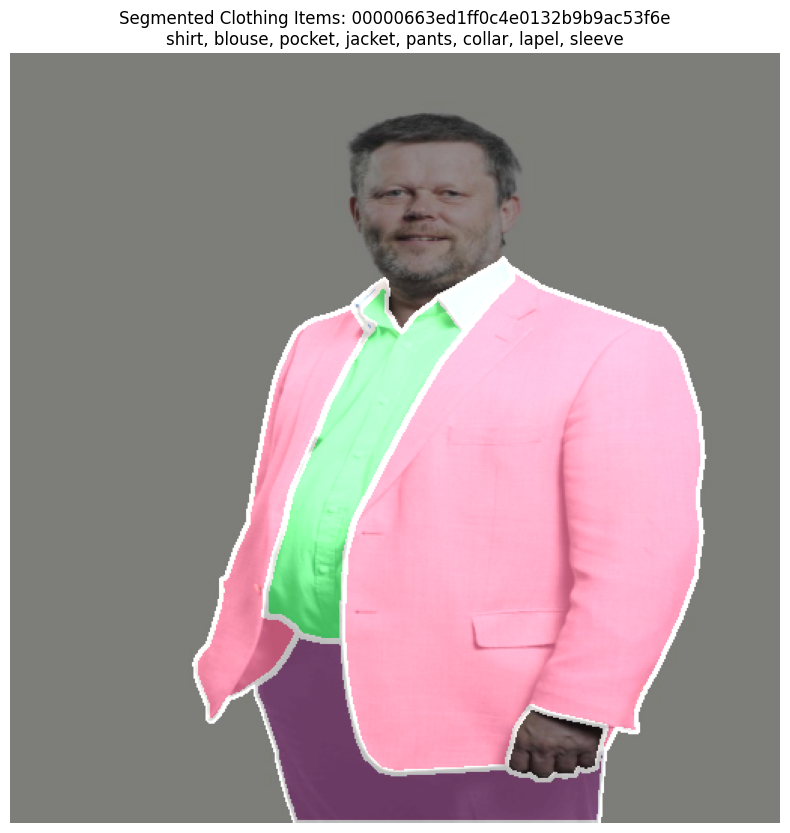

In [ ]:
show_image_with_masks(train_df, train_path, 0)